In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_csv ('C:\\Users\\PARIMITA\\Desktop\\Machine learning projects\\Movie recommender system\\tmdb_5000_movies.csv')
credits = pd.read_csv ('C:\\Users\\PARIMITA\\Desktop\\Machine learning projects\\Movie recommender system\\tmdb_5000_credits.csv')

In [3]:
# DATA PREPROCESSING

In [4]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [5]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [6]:
movies = movies.merge(credits,on='title')

In [7]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [8]:
# genres
# id
# keywords
# title
# overview
# cast
# crew

movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4809 non-null   int64 
 1   title     4809 non-null   object
 2   overview  4806 non-null   object
 3   genres    4809 non-null   object
 4   keywords  4809 non-null   object
 5   cast      4809 non-null   object
 6   crew      4809 non-null   object
dtypes: int64(1), object(6)
memory usage: 263.1+ KB


In [10]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [11]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [12]:
movies.dropna(inplace=True)

In [13]:
movies.duplicated().sum()

0

In [14]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [15]:
# '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
# [Action,Adventure,Fantasy,Science Fiction]

In [16]:
def convert(obj):
    L= []
    for i in ast.literal_eval(obj):
       L.append(i['name'])
    return L

In [17]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [18]:
movies['genres'] = movies['genres'].apply(convert)

In [19]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [20]:
movies['keywords'] = movies['keywords'].apply(convert)

In [21]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [22]:
movies['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [23]:
def convert3(obj):
    L = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 3:
          L.append(i['name'])
          counter+=1
        else:
            break
    return L

In [24]:
movies['cast'] = movies['cast'].apply(convert3)

In [25]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [26]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [27]:
def fetch_director(obj):
    L= []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
          L.append(i['name'])
          break
    return L

In [28]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [29]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [30]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [31]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [32]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [33]:
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [34]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [35]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [36]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [37]:
new_df = movies[['movie_id','title','tags']]

In [38]:
new_df

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


In [39]:
new_df['tags'] =  new_df['tags'].apply(lambda x:" ".join(x))

In [40]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [41]:
## Vectorization

In [42]:
import nltk

In [43]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [44]:
def stem(text):
    y = []

    for i in text.split():
        y.append(ps.stem(i))

    return " ".join(y)

In [45]:
new_df['tags'] =  new_df['tags'].apply(stem)

In [46]:
new_df['tags'][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [47]:
new_df['tags'] =  new_df['tags'].apply(lambda x:x.lower())

In [48]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."


In [49]:
!pip install nltk

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [51]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [52]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
len(cv.get_feature_names_out())

5000

In [55]:
['loved','loving','love']
['love','love','love']

['love', 'love', 'love']

In [56]:
ps.stem('loving')

'love'

In [57]:
stem('In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron')

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [58]:
from sklearn.metrics.pairwise import cosine_similarity

In [59]:
similarity = cosine_similarity(vectors)

In [60]:
## sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]

In [61]:
## MAIN FUNCTION

In [62]:
def recommend(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]

    for i in movies_list:
        print(new_df.iloc[i[0]].title)
        #print(i[0])
    return 

In [63]:
recommend('John Carter')

Riddick
Krrish
The Other Side of Heaven
The Legend of Hercules
Get Carter


In [64]:
## new_df[new_df['title'] == 'Batman Begins'].index[0]

In [65]:
## new_df.iloc[1216].title

In [66]:
## FRONTEND

In [67]:
import pickle

In [68]:
pickle.dump(new_df,open('movies.pkl','wb'))

In [69]:
new_df['title'].values

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'Signed, Sealed, Delivered', 'Shanghai Calling',
       'My Date with Drew'], dtype=object)

In [70]:
## pickle.dump(new_df.to_dict(),open('movie_dict.pkl','wb'))

In [71]:
pickle.dump(similarity,open('similarity.pkl','wb'))

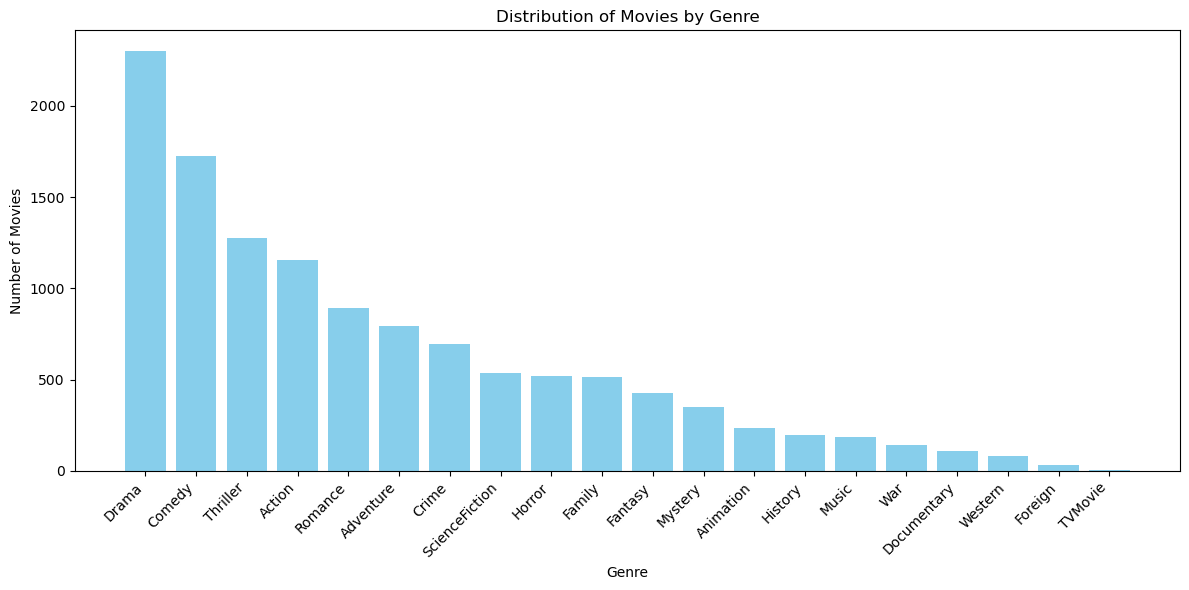

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


# Extract and flatten the 'genres' column (assume each entry is a list of genres)
all_genres = [genre for sublist in movies['genres'] for genre in sublist]

# Count the frequency of each genre
genre_counts = Counter(all_genres)

# Convert the Counter to a DataFrame for plotting
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])

# Sort by the count in descending order
genre_df = genre_df.sort_values(by='Count', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(genre_df['Genre'], genre_df['Count'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [73]:
movies['genres'] = movies['genres'].apply(lambda x: tuple(x))
movies['genres'].unique()

array([('Action', 'Adventure', 'Fantasy', 'ScienceFiction'),
       ('Adventure', 'Fantasy', 'Action'),
       ('Action', 'Adventure', 'Crime'), ...,
       ('Thriller', 'Horror', 'Comedy'), ('Foreign', 'Thriller'),
       ('Comedy', 'Drama', 'Romance', 'TVMovie')], dtype=object)

In [74]:
# Load the dataset
movies = pd.read_csv(r'C:\Users\PARIMITA\Desktop\Machine learning projects\Movie recommender system\tmdb_5000_movies.csv')

# Adjust column names as per the dataset
new_genre = movies[['id', 'title', 'genres', 'vote_average']]

# Display the first row
print(new_genre.head(1))


      id   title                                             genres  \
0  19995  Avatar  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

   vote_average  
0           7.2  


In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import ast
import pickle

# Load your dataset
movies = pd.read_csv(r'C:\Users\PARIMITA\Desktop\Machine learning projects\Movie recommender system\tmdb_5000_movies.csv')

# Parse the genres column
def parse_genres(genre_list):
    if isinstance(genre_list, str):
        genre_list = ast.literal_eval(genre_list)
    return " ".join([genre['name'] for genre in genre_list])

movies['genres_combined'] = movies['genres'].apply(parse_genres)

# Select only the required columns
new_genre = movies[['title', 'genres', 'genres_combined']]

# Create genre vectors
cv_genre = CountVectorizer(max_features=5000, stop_words='english')
genre_vectors = cv_genre.fit_transform(new_genre['genres_combined']).toarray()

# Compute cosine similarity matrix
genre_similarity = cosine_similarity(genre_vectors)

# Function to recommend movies based on genre
def recommend_genre(genre, top_n=5):
    """
    Recommend top N movies based on the genre provided by the user.
    """
    # Get indices of movies matching the genre
    genre_indices = [index for index, genres in enumerate(new_genre['genres_combined']) if genre.lower() in genres.lower()]

    if not genre_indices:
        print(f"No movies found for the genre '{genre}'.")
        return

    # Collect related movies
    related_movies = []
    for index in genre_indices:
        distances = genre_similarity[index]
        movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:(top_n + 1)]
        related_movies.extend([new_genre.iloc[i[0]].title for i in movies_list])

    # Remove duplicates and limit to top N
    recommended_movies = list(dict.fromkeys(related_movies))[:top_n]

    print(f"\nTop {len(recommended_movies)} movies in the genre '{genre}':\n")
    for movie in recommended_movies:
        print(movie)

# Main guard
if __name__ == "__main__":
    user_genre = input("Enter your preferred genre (e.g., Action, Comedy, Drama): ")
    recommend_genre(user_genre)


Enter your preferred genre (e.g., Action, Comedy, Drama):  Comedy



Top 5 movies in the genre 'Comedy':

The Adventures of Pluto Nash
The Stepford Wives
Pixels
Superhero Movie
The World's End


In [81]:
import os

# Define save directory
save_dir = r'C:\Users\PARIMITA\Desktop\Movie_recommendation_project'

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save DataFrame
with open(os.path.join(save_dir, 'movies.pkl'), 'wb') as file:
    pickle.dump(new_genre, file)

# Save Similarity Matrix
with open(os.path.join(save_dir, 'genre_similarity.pkl'), 'wb') as file:
    pickle.dump(genre_similarity, file)

print(f"Files saved successfully in {save_dir}")


Files saved successfully in C:\Users\PARIMITA\Desktop\Movie_recommendation_project


In [82]:
import os
import pandas as pd
import ast
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle

# Load the dataset
movies = pd.read_csv(r'C:\Users\PARIMITA\Desktop\Machine learning projects\Movie recommender system\tmdb_5000_movies.csv')

# Parse the genres column
def parse_genres(genre_list):
    if isinstance(genre_list, str):
        genre_list = ast.literal_eval(genre_list)
    return " ".join([genre['name'] for genre in genre_list])

movies['genres_combined'] = movies['genres'].apply(parse_genres)

# Select only the required columns
new_genre = movies[['id', 'title', 'genres', 'genres_combined']]

# Create genre vectors
cv_genre = CountVectorizer(max_features=5000, stop_words='english')
genre_vectors = cv_genre.fit_transform(new_genre['genres_combined']).toarray()

# Compute cosine similarity matrix
genre_similarity = cosine_similarity(genre_vectors)

# Define save directory
save_dir = r'C:\Users\PARIMITA\Desktop\Movie_recommendation_project'

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save DataFrame
with open(os.path.join(save_dir, 'movies.pkl'), 'wb') as file:
    pickle.dump(new_genre, file)

# Save Similarity Matrix
with open(os.path.join(save_dir, 'genre_similarity.pkl'), 'wb') as file:
    pickle.dump(genre_similarity, file)

print(f"Files saved successfully in {save_dir}")


Files saved successfully in C:\Users\PARIMITA\Desktop\Movie_recommendation_project


In [83]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import ast
import os

# File Paths
DATASET_PATH = r'C:\Users\PARIMITA\Desktop\Machine learning projects\Movie recommender system\tmdb_5000_movies.csv'
CREDITS_PATH = r'C:\Users\PARIMITA\Desktop\Machine learning projects\Movie recommender system\tmdb_5000_credits.csv'  # Path to credits file
MOVIES_PICKLE_PATH = r'C:\Users\PARIMITA\Desktop\Movie_recommendation_project\movies.pkl'
SIMILARITY_PICKLE_PATH = r'C:\Users\PARIMITA\Desktop\Movie_recommendation_project\similarity.pkl'
GENRE_SIMILARITY_PICKLE_PATH = r'C:\Users\PARIMITA\Desktop\Movie_recommendation_project\genre_similarity.pkl'
CAST_SIMILARITY_PICKLE_PATH = r'C:\Users\PARIMITA\Desktop\Movie_recommendation_project\cast_similarity.pkl'

# Load the datasets
movies = pd.read_csv(DATASET_PATH)
credits = pd.read_csv(CREDITS_PATH)

# Merge movies with cast data based on movie ID
movies = movies.merge(credits[['movie_id', 'cast']], left_on='id', right_on='movie_id', how='left')

# Handle missing values and process data
movies['overview'] = movies['overview'].fillna('')
movies['genres'] = movies['genres'].fillna('[]')
movies['cast'] = movies['cast'].fillna('[]')
movies['vote_average'] = movies['vote_average'].fillna(0.0)  # Ensure vote_average exists

# Create a combined genres column
movies['genres_combined'] = movies['genres'].apply(
    lambda x: " ".join([genre['name'] for genre in ast.literal_eval(x)]))

# Create a combined cast column (top 5 cast members)
movies['cast_combined'] = movies['cast'].apply(
    lambda x: " ".join([person['name'] for person in ast.literal_eval(x)[:5]]) if x != '[]' else '')

# Compute Title-Based Similarity
cv = CountVectorizer(max_features=5000, stop_words='english')
title_vectors = cv.fit_transform(movies['overview']).toarray()
similarity = cosine_similarity(title_vectors)

# Compute Genre-Based Similarity
genre_cv = CountVectorizer(max_features=5000, stop_words='english')
genre_vectors = genre_cv.fit_transform(movies['genres_combined']).toarray()
genre_similarity = cosine_similarity(genre_vectors)

# Compute Cast-Based Similarity
cast_cv = CountVectorizer(max_features=5000, stop_words='english')
cast_vectors = cast_cv.fit_transform(movies['cast_combined']).toarray()
cast_similarity = cosine_similarity(cast_vectors)

# Save processed data
os.makedirs(os.path.dirname(MOVIES_PICKLE_PATH), exist_ok=True)
with open(MOVIES_PICKLE_PATH, 'wb') as f:
    pickle.dump(movies[['id', 'title', 'genres', 'genres_combined', 'vote_average', 'cast_combined']], f)
with open(SIMILARITY_PICKLE_PATH, 'wb') as f:
    pickle.dump(similarity, f)
with open(GENRE_SIMILARITY_PICKLE_PATH, 'wb') as f:
    pickle.dump(genre_similarity, f)
with open(CAST_SIMILARITY_PICKLE_PATH, 'wb') as f:
    pickle.dump(cast_similarity, f)

print("Preprocessing completed. Files saved.")


Preprocessing completed. Files saved.


In [84]:
print(movies.columns)


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'genres_combined', 'cast_combined'],
      dtype='object')


In [85]:
if 'release_date' in movies.columns:
    print(movies['release_date'].head())
else:
    print("release_date column not found!")


0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object
